[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


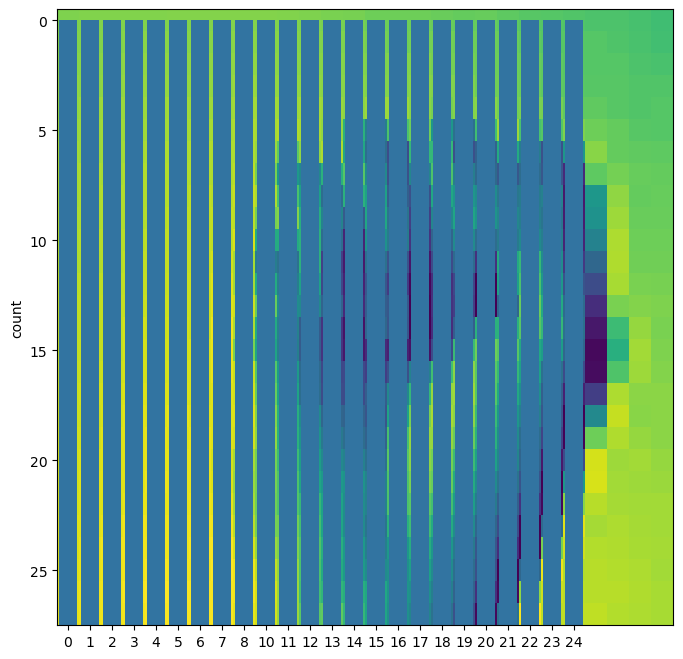

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
test= pd.read_csv(r"C:\Users\User\Desktop\aml final\sign_mnist_test.csv")
train = pd.read_csv(r"C:\Users\User\Desktop\aml final\sign_mnist_train.csv")
train.head()
labels = train['label'].values
unique_val = np.array(labels)
np.unique(unique_val)
plt.figure(figsize = (18,8))
sns.countplot(x = labels)
train.drop('label', axis = 1,inplace = True)
images = train.values
images = np.array([np.reshape(i,(28,28))for i in images])
images = np.array([i.flatten() for i in images])
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)
labels
index = 20
print(labels[index])
plt.imshow(images[index].reshape(28,28))
import cv2
for i in range(0,10):
    rand = np.random.randint(0, len(images))
    input_im = images[rand]
    sample = input_im.reshape(28,28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("sample image",sample)
    cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
import tensorflow
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
batch_size = 128
num_classes = 24
epochs = 10

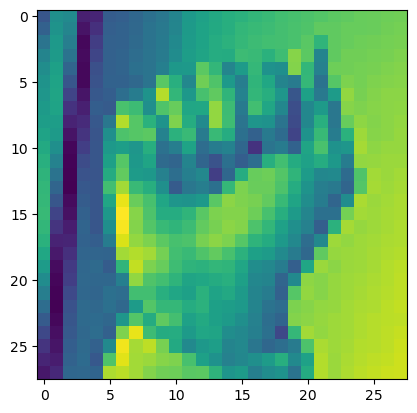

In [6]:
x_train = x_train / 255
x_test = x_test / 255
x_train  = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test  = x_test.reshape(x_test.shape[0], 28, 28, 1)
plt.imshow(x_train[0].reshape(28,28))

In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras import backend as K 
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28,1))) 
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense (128, activation = 'relu'))
model.add(Dropout (0.20))
model.add(Dense (num_classes, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy',
              optimizer= Adam(),
              metrics=['accuracy'])

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.0926 - loss: 3.0200 - val_accuracy: 0.4016 - val_loss: 1.9177
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4293 - loss: 1.7153 - val_accuracy: 0.6727 - val_loss: 0.9508
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6621 - loss: 0.9601 - val_accuracy: 0.8044 - val_loss: 0.5618
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7905 - loss: 0.5940 - val_accuracy: 0.8894 - val_loss: 0.3510
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8632 - loss: 0.3999 - val_accuracy: 0.9411 - val_loss: 0.2095
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9105 - loss: 0.2625 - val_accuracy: 0.9728 - val_loss: 0.1236
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9431 - loss: 0.1775 - val_accuracy: 0.9856 - val_loss: 0.0787
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9619 - loss: 0.1260 - val_accu

In [9]:
model.save("sign_mnist_cnn_50_Epochs.h5")
print("Model Saved")

Model Saved


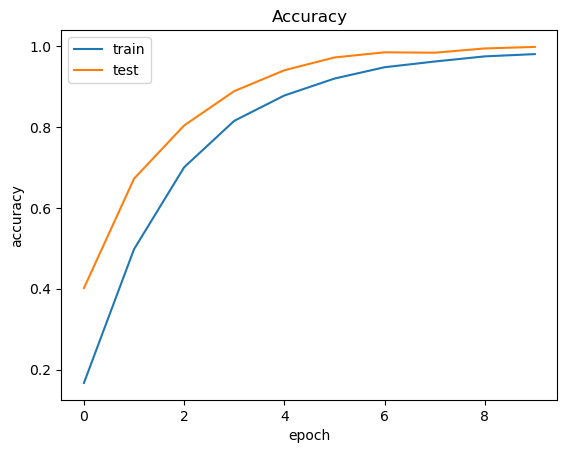

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.show()

In [11]:
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])
test_labels = label_binrizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images.shape
y_pred = model.predict(test_images)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred.round())

0.8354712771890686

In [13]:
def getLetter(result): 
    classLabels = { 0:'A',
                    1:'B',
                    2:'C',
                    3:'D',
                    4:'E',
                    5:'F',
                    6:'G',
                    7:'H',
                    8:'I',
                    9:'K',
                    10:'L',
                    11:'M',
                    12:'N',
                    13:'0', 
                    14:'P',
                    15:'Q',
                    16:'R',
                    17:'S',
                    18:'T',
                    19:'U',
                    20:'V',
                    21:'W',
                    22:'X',
                    23:'Y'}
    try:
        res = int(result)
        return classLabels[res]
    except:
      return "Error"

In [15]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    roi = frame[100:400, 320:620] 
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation = cv2.INTER_AREA)
    cv2.imshow('roi sacled and gray', roi)
    copy = frame.copy() 
    cv2.rectangle(copy, (320, 100), (620, 400), (255,0,0), 5)
    roi = roi.reshape(1,28,28,1)
    result = str(np.argmax(model.predict(roi, 1, verbose = 0),axis=1)[0])
    cv2.putText(copy, getLetter(result), (300 , 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('frame', copy)
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()